In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression,Ridge

In [217]:
data=pd.read_csv('kc_house_data.csv')
train=pd.read_csv('wk3_kc_house_train_data.csv')
test=pd.read_csv('wk3_kc_house_test_data.csv')
valid=pd.read_csv('wk3_kc_house_valid_data.csv')
tr_val_sh=pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')
set1=pd.read_csv('wk3_kc_house_set_1_data.csv')
set2=pd.read_csv('wk3_kc_house_set_2_data.csv')
set3=pd.read_csv('wk3_kc_house_set_3_data.csv')
set4=pd.read_csv('wk3_kc_house_set_4_data.csv')

In [218]:
def polynomial_frame(feat, deg):
    df=pd.DataFrame()
    df['power_1']=feat
    if(deg>1):
        for power in range(2,deg+1):
            name='power_'+str(power)
            df[name]=feat**power
    return df

In [219]:
# sort by sqft and if same,then by price
data=data.sort_values(['sqft_living','price'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [220]:
poly_15 = polynomial_frame(data['sqft_living'],deg=15)
poly_15['price']=data['price']
poly_15.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,-5315590925028654848,8005133933292429824,-2800912632598854656,-607924210447579136,8169419707297566720,7948473681471741952,-785641586888785920,-6475131313233297408,142000.0
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,759807991618519296,4427795793208865280,-3475779072869940224,5233828197790730240,-391694556932730880,2646966524565987328,1700178182809075712,1876629133233258496,276000.0
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,-7942643919429238784,7061338705255727104,8530817309291315200,-4916379442181308416,-5103036584232484864,-2245774268841328640,-4843994769065508864,3956395126061793280,245000.0
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,-6845471433603153920,-9223372036854775808,0,0,0,0,0,0,265000.0
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,245347910523003136,3451964735423464960,-346070565645933568,-5840312085947230208,-8772192453144932352,-8507403090256568320,2526728067657646080,7746510479875735552,228000.0


In [221]:
from sklearn.linear_model import Ridge

In [222]:
# negligible ridge regression
l2_s_pen = 1.5e-5
x=poly_15.iloc[:,:-1]
y=poly_15.iloc[:,-1]
model=Ridge(alpha=l2_s_pen,normalize=True)
model.fit(x,y)

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [223]:
# coeff learned
model.coef_

array([ 7.01020132e+01,  1.37941144e-02,  8.65543688e-06, -6.27671473e-10,
       -1.94650224e-14, -1.57815966e-16, -4.60871912e-16,  3.42228860e-16,
       -1.99319710e-16, -2.50411580e-16,  2.16777428e-16,  6.76179392e-16,
        4.48006670e-16, -4.08142514e-16,  6.70601594e-17])

### on 4 sets with negligible penalty

In [224]:
l2=1e-9

In [225]:
# set1
s1_15 = polynomial_frame(set1['sqft_living'],deg=15)
model1=Ridge(alpha=l2,normalize=True)
model1.fit(s1_15,set1['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [226]:
# set2
s2_15 = polynomial_frame(set2['sqft_living'],deg=15)
model2=Ridge(alpha=l2,normalize=True)
model2.fit(s2_15,set2['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [227]:
# set3
s3_15 = polynomial_frame(set3['sqft_living'],deg=15)
model3=Ridge(alpha=l2,normalize=True)
model3.fit(s3_15,set3['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [228]:
# set4
s4_15 = polynomial_frame(set4['sqft_living'],deg=15)
model4=Ridge(alpha=l2,normalize=True)
model4.fit(s4_15,set4['price'])

Ridge(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [229]:
s1_pred=model1.predict(s1_15)
s2_pred=model2.predict(s2_15)
s3_pred=model3.predict(s3_15)
s4_pred=model4.predict(s4_15)

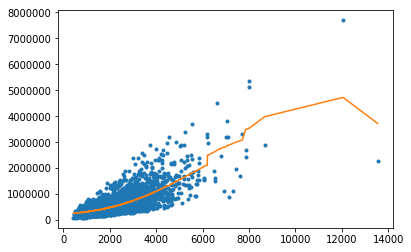

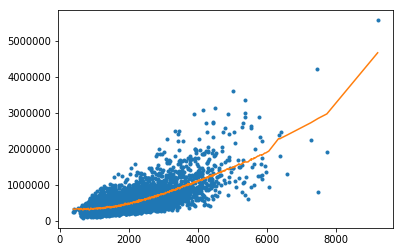

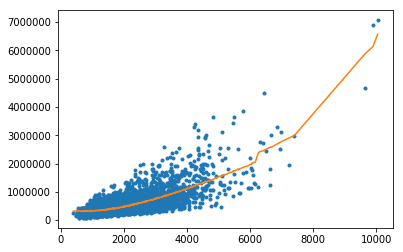

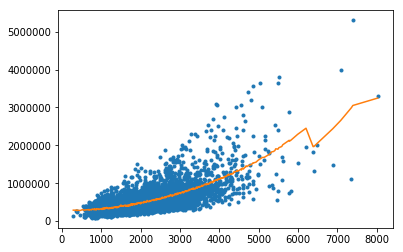

In [230]:
plt.plot(s1_15['power_1'],set1['price'],'.',s1_15['power_1'],s1_pred,'-')
plt.show()
plt.plot(s2_15['power_1'],set2['price'],'.',s2_15['power_1'],s2_pred,'-')
plt.show()
plt.plot(s3_15['power_1'],set3['price'],'.',s3_15['power_1'],s3_pred,'-')
plt.show()
plt.plot(s4_15['power_1'],set4['price'],'.',s4_15['power_1'],s4_pred,'-')
plt.show()

In [231]:
print(model1.coef_)
print(model1.intercept_)

[ 6.23857718e+01  1.98235299e-02  7.56558420e-06 -5.91491377e-10
 -1.96217953e-14  1.86865173e-16 -6.62909386e-16  2.79625958e-16
 -1.81062210e-16 -1.24404650e-15  2.30366670e-16  5.06433875e-16
  2.25732230e-16 -3.14308031e-16 -3.32978688e-16]
227417.22904264537


In [232]:
print(model2.coef_)
print(model2.intercept_)

[-2.19894686e+02  1.69130364e-01 -2.27849601e-05  1.34431957e-09
 -1.20432513e-14  7.64003745e-16 -4.89141524e-16 -2.93941735e-16
 -6.17970420e-16  3.81800372e-16  5.15069439e-16  8.98788959e-16
  1.08009405e-15 -4.37750733e-16  1.40403443e-15]
398707.2633988985


In [233]:
print(model3.coef_)
print(model3.intercept_)

[-1.98970177e+02  1.57531730e-01 -2.04008046e-05  1.26203624e-09
 -1.59074526e-14 -2.70708681e-16 -4.55047514e-16  5.97386817e-16
  4.28518765e-16  5.27358368e-16 -4.79130198e-16  1.20138611e-15
  6.23420738e-16  3.65494169e-16 -3.00231269e-16]
389087.92292773764


In [234]:
print(model4.coef_)
print(model4.intercept_)

[-3.48248202e+01  7.33755964e-02 -5.31371126e-06  3.38536611e-10
  3.57683193e-14 -1.23385098e-15 -4.13869228e-16  8.99222180e-16
 -4.98668926e-16 -5.35366910e-16  2.49778932e-16  4.01979504e-16
  3.06323327e-16 -1.03551797e-15 -3.19399858e-16]
290807.15926167066


## ridge regression with large penalty

In [235]:
l2_l=1.23e2

In [236]:
# set1
s1_15 = polynomial_frame(set1['sqft_living'],deg=15)
model1=Ridge(alpha=l2_l,normalize=True)
model1.fit(s1_15,set1['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [237]:
# set2
s2_15 = polynomial_frame(set2['sqft_living'],deg=15)
model2=Ridge(alpha=l2_l,normalize=True)
model2.fit(s2_15,set2['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [238]:
# set3
s3_15 = polynomial_frame(set3['sqft_living'],deg=15)
model3=Ridge(alpha=l2_l,normalize=True)
model3.fit(s3_15,set3['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [239]:
# set4
s4_15 = polynomial_frame(set4['sqft_living'],deg=15)
model4=Ridge(alpha=l2_l,normalize=True)
model4.fit(s4_15,set4['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [240]:
s1_pred=model1.predict(s1_15)
s2_pred=model2.predict(s2_15)
s3_pred=model3.predict(s3_15)
s4_pred=model4.predict(s4_15)

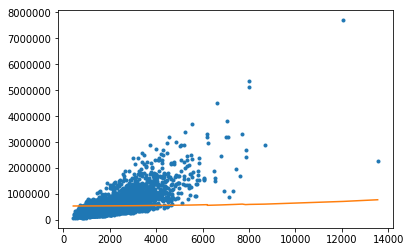

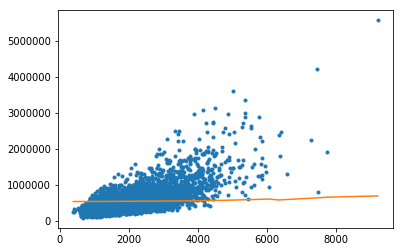

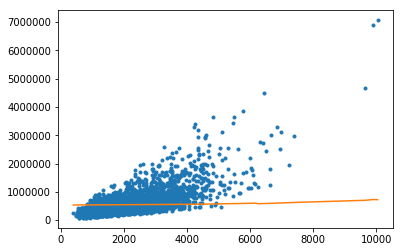

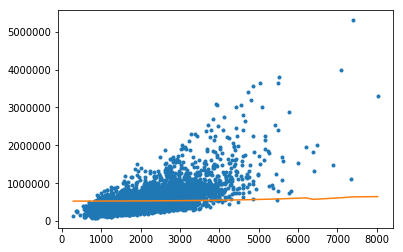

In [241]:
plt.plot(s1_15['power_1'],set1['price'],'.',s1_15['power_1'],s1_pred,'-')
plt.show()
plt.plot(s2_15['power_1'],set2['price'],'.',s2_15['power_1'],s2_pred,'-')
plt.show()
plt.plot(s3_15['power_1'],set3['price'],'.',s3_15['power_1'],s3_pred,'-')
plt.show()
plt.plot(s4_15['power_1'],set4['price'],'.',s4_15['power_1'],s4_pred,'-')
plt.show()

In [242]:
print(model1.coef_)
print(model1.intercept_)

[ 2.33302293e+00  3.56038341e-04  3.37288360e-08  2.06040887e-12
  1.36746708e-15 -1.92341983e-17  1.04834390e-17 -9.30269146e-18
 -8.46418543e-18 -1.59248399e-17  9.41566963e-18  1.22423043e-18
  5.91820334e-18 -1.47750360e-17 -2.35836923e-17]
538993.0574768196


In [243]:
print(model2.coef_)
print(model2.intercept_)

[ 2.10772269e+00  3.94453401e-04  6.78444742e-08  9.15014451e-12
  1.94720746e-15 -2.53164281e-17  1.02334725e-17 -4.38033903e-18
 -7.39193953e-18 -1.03274762e-18  8.33154295e-18  4.90077187e-18
 -3.58306755e-18 -1.75676068e-17 -1.57687979e-17]
529947.1244426621


In [244]:
print(model3.coef_)
print(model3.intercept_)

[ 2.31123641e+00  4.20062138e-04  6.28136039e-08  6.89987701e-12
  1.20756329e-15 -1.89793802e-17  5.95314134e-18 -8.07909989e-18
 -5.49082928e-18 -1.34742751e-17  2.35169643e-18 -4.76775704e-18
 -1.73049455e-17 -1.11975184e-17 -3.04976179e-17]
533849.9674388649


In [245]:
print(model4.coef_)
print(model4.intercept_)

[ 2.10018378e+00  4.09722690e-04  7.60925093e-08  1.16346493e-11
  2.52725095e-15 -3.60823239e-17  1.34459584e-17 -1.42653353e-18
 -1.20066039e-17 -7.79542974e-18  1.44429140e-17 -7.79955285e-18
 -2.56592299e-18 -2.15123845e-17 -2.67990091e-17]
524791.1112752551


## select penalty via cross val

In [246]:
n = len(tr_val_sh)
k = 10       # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print( i, (start, end))
print(n)

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)
19396


In [247]:
def k_fold_cross_validation(k, l2_pen, data, out):
    err=0.0
    n=len(data)
    for i in range(k):
        start=int((n*i)/k)
        end=int((n*(i+1))/k-1)
        
        val_x=data[start:end+1]
        train_x=data[0:start]
        train_x=train_x.append(data[end+1:n])
        
        val_y=out[start:end+1]
        train_y=out[0:start]
        train_y=train_y.append(out[end+1:n])
        
        model=Ridge(alpha=l2_pen)
        model.fit(train_x,train_y)
        
        pred=np.array(model.predict(val_x))
        t= np.sum( (val_y-pred)**2 )
        err+=t
        
    err=float(err)
    return err/k

In [248]:
l2_pen=np.logspace(3, 9, num=13)
l2_pen

array([1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06, 3.16227766e+06,
       1.00000000e+07, 3.16227766e+07, 1.00000000e+08, 3.16227766e+08,
       1.00000000e+09])

In [249]:
l2_err=[]
k=10  # no. of folds
min_err=None
best_l2=None
df=polynomial_frame(tr_val_sh['sqft_living'],deg=15)
df.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,2800,7840000,21952000000,61465600000000,172103680000000000,2274958083551657984,5755928514847047680,-5854478850414608384,6614700366887911424,629977281762164736,-6951042142055694336,-1602999992367185920,-5841168716699533312,6989586621679009792,-1152921504606846976
1,2490,6200100,15438249000,38441240010000,95718687624900000,-1468140772223171008,-3215196241204589952,48287390516420864,-8891606130078909952,-4006375445023841280,3813685767502637056,-3995636878852812800,-6340772614055550976,1889118097054253056,-15677130845552640
2,2340,5475600,12812904000,29982195360000,70158337142400000,-1850187750169964544,5545521924027596800,8460218406761725952,3554680732089843712,-1528664152773492736,1594232809680011264,4262471761896931328,-5504621038048116736,-4985865583326134272,-8583210398717575168
3,1320,1742400,2299968000,3035957760000,4007464243200000,5289852801024000000,-8710306584240062464,-5283133275831795712,-866664235759828992,-298658632982069248,-6847769988430823424,-151788611006627840,2553218282056318976,-5506033174506897408,53374692458758144
4,1904,3625216,6902411264,13142191046656,25022731752833024,-7696950963734577152,-8279840425250914304,7150013343925796864,-71719562931863552,-7426839306301341696,7950665337471500288,-6710081969805328384,7597572571374026752,3530822107858468864,8070450532247928832


In [250]:
for l2 in l2_pen:
    err=k_fold_cross_validation(k,l2,df,tr_val_sh[['price']])
    l2_err.append(err)
    if(min_err is None or err<min_err):
        min_err=err
        best_l2=l2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.06624e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.09745e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08004e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.10083e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.09392e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.72623e-35): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08224e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.08338e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.07269e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.09369e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.42832e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.46236e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.443e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.46498e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.46062e-34): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\rid

In [251]:
l2_err

[128444667313677.72,
 128444636419486.66,
 128444538735878.03,
 128444229957146.12,
 128443254750996.75,
 128440183205446.45,
 128430591764793.78,
 128401427886625.8,
 128319495134565.75,
 128132820732373.05,
 127856602516294.17,
 127631417885000.12,
 127521291038581.7]

In [252]:
best_l2

1000000000.0

In [253]:
## final model using best l2 pen
model=Ridge(alpha=best_l2)
model.fit(df,tr_val_sh[['price']])
print(model.coef_)
print(model.intercept_)

[[ 8.17671921e+00  3.65326478e-02  5.88832510e-06 -5.22782403e-10
  -2.53670727e-14 -2.99248181e-16 -3.83648264e-16  3.71587155e-16
  -2.84844706e-16 -1.07195802e-16  1.54794639e-16  7.77887040e-16
   4.18091419e-16 -2.00379189e-16  5.70890426e-17]]
[276262.9435339]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.14209e-33): result may not be accurate.
  overwrite_a=True).T


In [254]:
test_x=polynomial_frame(test['sqft_living'],deg=15)
test_y=np.array(test['price'])
pred=model.predict(test_x)

err= np.sum( (test_y-pred)**2 )
print(err)

9.602153261968518e+17
